<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/Book_review_fastai_cookbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/uDsSYBGUTbk

Link to the book on Amazon: https://www.amazon.com/Deep-Learning-fastai-Cookbook-easy/dp/1800208103/ref=sr_1_4?dchild=1&keywords=deep+learning+with+fastai&qid=1634237733&sr=8-4


Fastai API paper (pdf): https://arxiv.org/pdf/2002.04688.pdf

In [ ]:
# imports for notebook boilerplate
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.all import *

     |████████████████████████████████| 720 kB 12.0 MB/s 
     |████████████████████████████████| 1.2 MB 43.6 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 186 kB 44.9 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 51 kB 277 kB/s 


In [ ]:
# set up the notebook for fast.ai
fastbook.setup_book()  #connects to Google Drive with a 1-time token.

Mounted at /content/gdrive


In [ ]:
# Look for CIFAR dataset from the list of available URLs and un-tgz (untar)
path = untar_data(URLs.CIFAR)

In [ ]:
path

Path('/root/.fastai/data/cifar10')

In [ ]:
#Define the dataloader. here, you can define any transformations, batch size, etc. 
dls = ImageDataLoaders.from_folder(path, train='train', valid='test')

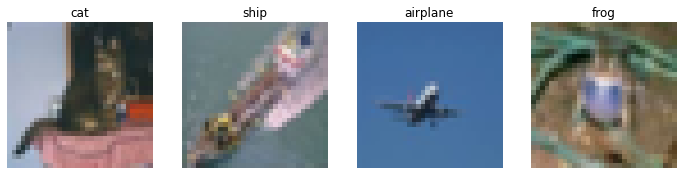

In [ ]:
# show a batch of training data
dls.train.show_batch(max_n=4, nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet18, 
                    loss_func=LabelSmoothingCrossEntropy(), 
                    metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 16 x 16   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                      

In [ ]:
%%time
#Train for 5 epochs
learn.fine_tune(5)  #use fine_tune for transfer learning and fit_one_cycle for training from scratch

epoch,train_loss,valid_loss,accuracy,time
0,1.847705,1.706274,0.459100,01:33


epoch,train_loss,valid_loss,accuracy,time
0,1.321310,1.226871,0.678600,01:38
1,1.126461,1.068375,0.748700,01:39
2,0.953695,1.004217,0.781000,01:39
3,0.827084,0.989784,0.792800,01:38
4,0.745682,0.999520,0.790600,01:39


CPU times: user 5min 13s, sys: 9.44 s, total: 5min 23s
Wall time: 9min 48s


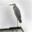

In [ ]:

# take a look at one of the test images
img_test_files = get_image_files(path/"test")
img2 = PILImage.create(img_test_files[900])
img2

In [ ]:
# apply the trained model to the image
learn.predict(img2)

('bird',
 tensor(2),
 tensor([0.0131, 0.0096, 0.9167, 0.0133, 0.0064, 0.0051, 0.0039, 0.0073, 0.0143, 0.0104]))